<a href="https://colab.research.google.com/github/sureshnaidugolla/myrepo/blob/GP/PDS_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
a=np.random.rand(10,2)
l=[]
min_dist=0.000000001
k=[]
for i in range(len(a)):
  for j in a:
    print(a[i],j,type(a[i]),type(j))
    if(np.linalg.norm(a[i]-j)<min_dist):
      l.append(i)
      break

print(len(l))
print(k)
a=np.delete(a,l,0)
print(a)


In [ ]:
a=np.asarray([1,2])
b=np.asarray([1,2])
a.all()

True

In [ ]:
R_ix = np.random.rand(10,2) # points
l    = 0.1 ## min allowed distance
R_ix
D_ij    = np.linalg.norm( R_ix[:,None,:] - R_ix[None,:,:], axis=2)
mask_ij = ( (D_ij+np.eye(D_ij.shape[0])) < 0.1 )
R_ix[ np.logical_not(np.any(mask_ij, axis=1)), :]

In [ ]:
R_ix[:,None,:]-R_ix[None,:]


In [ ]:

ar=np.random.rand(5,2)
print(ar)
ar=np.delete(ar,1,0)
ar

[[0.03575408 0.95058511]
 [0.72421289 0.92636644]
 [0.52464179 0.18318816]
 [0.13390937 0.77901863]
 [0.12899897 0.3601124 ]]


array([[0.03575408, 0.95058511],
       [0.52464179, 0.18318816],
       [0.13390937, 0.77901863],
       [0.12899897, 0.3601124 ]])

In [ ]:
import numpy as np
s = np.random.poisson(5, 10000)

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

## poisson disc Sampling

77 [array([0, 0]), array([-0.77981543,  0.66054833]), array([-0.46509649, -1.09953581]), array([ 0.0679153 , -2.99167302]), array([ 0.27234577, -4.0226135 ]), array([ 1.76131463, -4.17000227]), array([ 2.77796409, -3.90460645]), array([ 2.59408292, -5.0592872 ]), array([ 4.37003701, -5.18756828]), array([ 3.70668232, -6.01663839]), array([ 3.16794534, -7.06101117]), array([ 4.87846311, -6.92032271]), array([ 5.40648961, -5.950639  ]), array([ 7.20430789, -5.83107304]), array([ 8.33780824, -4.82349978]), array([ 9.00761739, -3.76613215]), array([ 9.86986749, -3.13252918]), array([10.70400156, -2.35363977]), array([10.34894101, -1.37261629]), array([11.72299161, -0.85305294]), array([12.66685095, -1.4903967 ]), array([14.58229366, -1.16922865]), array([13.43111554, -0.7554405 ]), array([12.06541157,  0.39987339]), array([11.54840811,  1.26862428]), array([13.2395167 ,  1.24139742]), array([14.60246314,  1.85727049]), array([16.0887858 ,  0.70634328]), array([16.05832164,  1.99336768]), a

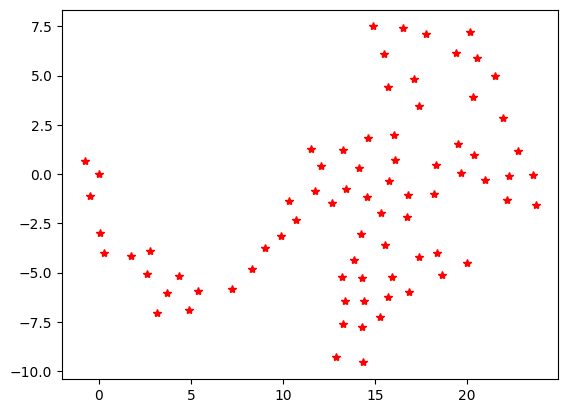

In [64]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import time

π = np.pi

######################################

#### user defines
x_center = 0.0
y_center = 0.0
N        = 30 ## num of random points we generate
R        = 1.0 ## minimum separation
center = np.array([0,0])
DesiredNumOfPoints=100 ## number of points to be sampled

#######################################

#fig, axes = plt.subplots(int(DesiredNumOfPoints/2), int(DesiredNumOfPoints/2))

def draw(active_list,x_center,y_center):
  active_list=np.asarray(active_list)
  #axes[axisx,axisy].plot(active_list.T[0],active_list.T[1])
  circle1 = plt.Circle((x_center, y_center), R , color='r', fill=False)
  circle2 = plt.Circle((x_center, y_center), 2*R , color='r', fill=False)
  plt.scatter(active_list.T[0],active_list.T[1])
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)
  plt.gca().set_aspect('equal')
  for xy in zip(active_list.T[0], active_list.T[1]):
   plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
  plt.show()

#############################################

# In the above line we are finding the radial distance r from the center of the circle
# we are taking a random number between [0,1] and then multiplying with R (min dist which is a radius of circle) and
# adding R to make it R distance away from the point
# basically finding a point between circles with radius R and 2R


# the same way we are trying to find the random angle fro the center of the circle
# we are multiplying random value [0,1] by 2 * PI (which represents a full circle, or 360 degrees)
# ensures that theta ranges from 0 to 2π radians (or 0 to 360 degrees), covering all possible directions around the circle.

#######################################################
ptime_taken=[]
ptime_taken.append(0)
start=time.time()
active_list = []
active_list.append(center)
numOfPoints=1
for base_point in active_list:
  r = R+np.random.rand(N)*R
  θ = 2*π*np.random.rand(N)
  sample_pts = np.asarray([base_point[0]+r*cos(θ), base_point[1]+r*sin(θ)])
  for i in sample_pts.T:
    flag=True
    for j in active_list:
      if(np.linalg.norm(j-i)<R):
        flag=False
        break
    if(flag):
      numOfPoints=numOfPoints+1
      active_list.append(np.array(i))
      #axisy=axisy+1
      #plt.plot(i[0], i[1], 'r*')
      break
  #draw(active_list,base_point[0],base_point[1])
  #axisx=axisx+1
  #if(numOfPoints>=DesiredNumOfPoints):
    #print("Time taken",time.time()-start)
    #break
  if(numOfPoints>=DesiredNumOfPoints):
      print(len(active_list))
      print("Time taken",time.time()-start)
      break
print(len(active_list),active_list)
active_list=np.asarray(active_list)
plt.plot(active_list.T[0],active_list.T[1], 'r*')
plt.show()


# Basic implementation of the generating random points with min separation

## Generating the random number of points

In [39]:
import numpy as np
import math
import time

N=100
min_Dist=0.2
time_taken=[]
time_taken.append(0)
for num in range(1,N):
  generatedPoints=[]
  while(True):
    start=time.time()
    xn=np.random.randn(30)
    yn=np.random.randn(30)
    points=[[abs(xn[i]),abs(yn[i])] for i in range(30)]
    rng = np.random.default_rng()
    x=rng.random(size=(10,))
    y=rng.random(size=10,)
    generatedPoints.append(points[0])
    points.pop(0)
    for i in points:
      flag=True
      for j in generatedPoints:
        if(math.dist(i,j)<min_Dist):
          flag=False
      if(flag):
        generatedPoints.append(i)
        break
    if(len(generatedPoints)>=num):
      time_taken.append(time.time()-start)
      #print(time_taken)
      break
len(time_taken)
print(len(generatedPoints))

100


## plot after generating the random points with the given range

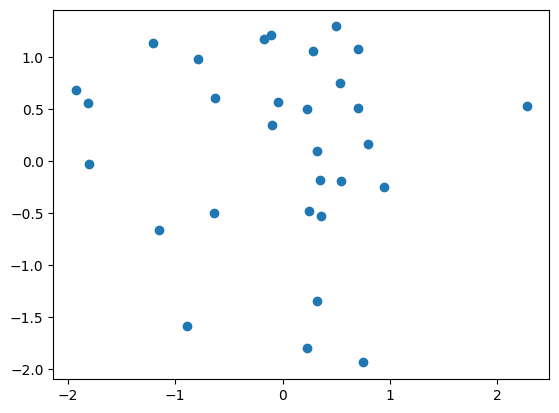

In [33]:
from matplotlib import pyplot as pt
pt.scatter(xn,yn)

## plots after maximizing the distance between points that is deleting the closest points

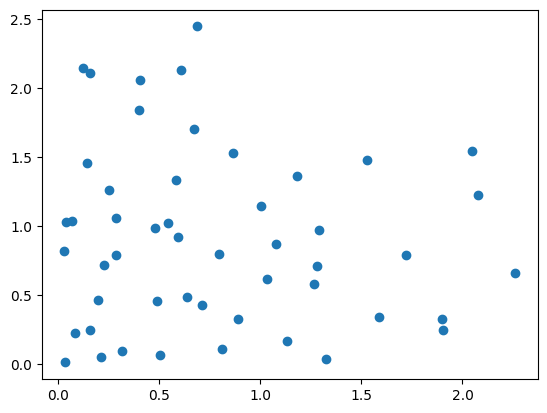

In [34]:
from matplotlib import pyplot as pt
x=[]
for i in generatedPoints:
  x.append(i[0])
y=[]
for i in generatedPoints:
  y.append(i[1])
pt.scatter(x,y)

## PDS for different N

99 [array([0, 0]), array([-0.11259383, -2.82304726]), array([-2.69982762, -0.20563586]), array([-5.37107385,  0.52725299]), array([-2.88512748,  2.07202252]), array([-5.3785978 ,  4.60075179]), array([-6.10306203,  6.65532819]), array([-8.02132359,  5.87092461]), array([-6.07280459,  8.86746423]), array([-7.11283256, 10.63254771]), array([-10.32212697,  12.28063047]), array([-12.30242479,  10.53976463]), array([-11.13191083,   8.18899122]), array([-8.16574031,  8.52614219]), array([-9.56520219, 10.40067735]), array([-7.96229461, 14.02750902]), array([-5.525149  , 13.88353552]), array([-3.71866299, 12.64835309]), array([-0.17855261, 13.98059041]), array([ 2.33639182, 16.67783051]), array([-0.48525093, 18.10044385]), array([ 0.706171  , 20.29128513]), array([ 1.96831245, 24.02574814]), array([ 3.33093507, 27.55935781]), array([ 0.55895841, 26.21886022]), array([-0.0494805 , 28.46209082]), array([ 0.28941768, 31.82217753]), array([-2.43628912, 32.60667903]), array([-2.58384011, 36.4422362

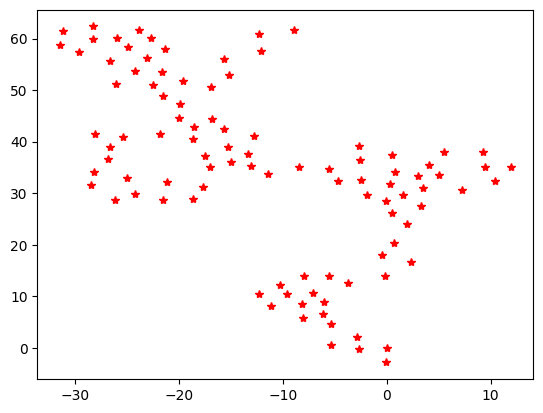

In [38]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import time

π = np.pi
np.random.seed(seed=156)

######################################

#### user defines
x_center = 0.0
y_center = 0.0
N        = 30 ## num of random points we generate
R        = 2.0 ## minimum separation
center = np.array([0,0])
DesiredNumOfPoints=100 ## number of points to be sampled

#######################################

#fig, axes = plt.subplots(int(DesiredNumOfPoints/2), int(DesiredNumOfPoints/2))

def draw(active_list,x_center,y_center,axisx,axisy):
  active_list=np.asarray(active_list)
  #axes[axisx,axisy].plot(active_list.T[0],active_list.T[1])
  circle1 = plt.Circle((x_center, y_center), R , color='r', fill=False)
  circle2 = plt.Circle((x_center, y_center), 2*R , color='r', fill=False)
  plt.scatter(active_list.T[0],active_list.T[1])
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)
  plt.gca().set_aspect('equal')
  for xy in zip(active_list.T[0], active_list.T[1]):
   plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
  plt.show()

#############################################

# In the above line we are finding the radial distance r from the center of the circle
# we are taking a random number between [0,1] and then multiplying with R (min dist which is a radius of circle) and
# adding R to make it R distance away from the point
# basically finding a point between circles with radius R and 2R


# the same way we are trying to find the random angle fro the center of the circle
# we are multiplying random value [0,1] by 2 * PI (which represents a full circle, or 360 degrees)
# ensures that theta ranges from 0 to 2π radians (or 0 to 360 degrees), covering all possible directions around the circle.

#######################################################
ptime_taken=[]
ptime_taken.append(0)
for num in range(1,DesiredNumOfPoints):
  #DesiredNumOfPoints=num
  start=time.time()
  active_list = []
  active_list.append(center)
  numOfPoints=1
  for base_point in active_list:
    r = R+np.random.rand(N)*R
    θ = 2*π*np.random.rand(N)
    sample_pts = np.asarray([base_point[0]+r*cos(θ), base_point[1]+r*sin(θ)])
    for i in sample_pts.T:
      flag=True
      for j in active_list:
        if(np.linalg.norm(j-i)<R):
          flag=False
          break
      if(flag):
        active_list.append(np.array(i))
        #axisy=axisy+1
        #plt.plot(i[0], i[1], 'r*')
        break
    #draw(active_list,base_point[0],base_point[1],axisx,axisy)
    #axisx=axisx+1
    numOfPoints=numOfPoints+1
    if(numOfPoints>=num):
      ptime_taken.append(time.time()-start)
      break
print(len(active_list),active_list)
active_list=np.asarray(active_list)
plt.plot(active_list.T[0],active_list.T[1], 'r*')
plt.show()


## time taken

84
100


ValueError: x and y must have same first dimension, but have shapes (20,) and (84,)

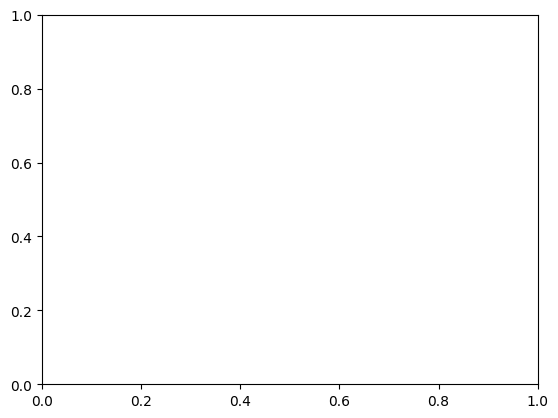

In [42]:
import matplotlib.pyplot as plt

ptime=[0, 0.02403545379638672, 0.0009675025939941406, 0.0009081363677978516, 0.0017478466033935547, 0.002715587615966797, 0.002445697784423828, 0.003141164779663086, 0.0036308765411376953, 0.004774332046508789, 0.005079984664916992, 0.005615234375, 0.006710529327392578, 0.0075571537017822266, 0.007814645767211914, 0.008368253707885742, 0.010805606842041016, 0.009531736373901367, 0.010780096054077148, 0.014195919036865234] #, 0.012491941452026367]
gtime=[0, 0.0003979206085205078, 0.0002810955047607422, 0.00022268295288085938, 0.00010943412780761719, 0.00010442733764648438, 0.00011157989501953125, 0.00011348724365234375, 0.00012540817260742188, 0.00010943412780761719, 0.00010943412780761719, 0.00011324882507324219, 0.00017213821411132812, 0.00012302398681640625, 0.00011324882507324219, 0.00012159347534179688, 0.00011754035949707031, 0.00011467933654785156, 7.891654968261719e-05, 7.2479248046875e-05]
x=[i for i in range(20)]
#ptime=ptime_taken
#print(len(ptime_taken))
gtime=time_taken
print(len(time_taken))
plt.plot(x,ptime,label="PDS")
plt.plot(x[:84:],gtime,label="general method")
plt.legend()
plt.show()